In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/liver_cancer_prediction.csv")

In [3]:
data.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [4]:
print("Dataset Shape:", data.shape)

Dataset Shape: (160292, 25)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [6]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Country                    0
Region                     0
Population                 0
Incidence_Rate             0
Mortality_Rate             0
Gender                     0
Age                        0
Alcohol_Consumption        0
Smoking_Status             0
Hepatitis_B_Status         0
Hepatitis_C_Status         0
Obesity                    0
Diabetes                   0
Rural_or_Urban             0
Seafood_Consumption        0
Herbal_Medicine_Use        0
Healthcare_Access          0
Screening_Availability     0
Treatment_Availability     0
Liver_Transplant_Access    0
Ethnicity                  0
Preventive_Care            0
Survival_Rate              0
Cost_of_Treatment          0
Prediction                 0
dtype: int64


The dataset has no missing values across any of the 25 variables, ensuring data completeness and reducing the need for imputation techniques. This completeness is beneficial for modeling as it eliminates the risk of bias introduced by missing data handling methods such as mean imputation or predictive modeling.

In [7]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


Number of duplicate rows: 0

In [8]:
# Get summary statistics for numerical features
data.describe()

,Population,Incidence_Rate,Mortality_Rate,Age,Survival_Rate,Cost_of_Treatment
count,1.602920e+05,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,7.527321e+08,18.523468,15.525234,54.640088,49.957811,25275.608904
std,4.328283e+08,9.513400,8.376871,20.188217,23.036437,14307.105453
min,1.011968e+06,2.000035,1.000080,20.000000,10.000548,500.397303
25%,3.772400e+08,10.319582,8.286968,37.000000,30.129577,12858.138774
50%,7.548388e+08,18.529822,15.565488,55.000000,49.858143,25349.819261
75%,1.126721e+09,26.751354,22.808666,72.000000,69.833652,37672.515875
max,1.499993e+09,34.999952,29.999829,89.000000,89.998005,49999.791824


In [9]:
# Check unique values and percentage distribution in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    value_counts = data[col].value_counts()
    percentage = (value_counts / len(data)) * 100  # Calculate percentage
    
    print(f"\n{col} - Unique Values and Distribution:\n")
    print(pd.DataFrame({'Count': value_counts, 'Percentage': percentage.round(2)}))


Country - Unique Values and Distribution:

                Count  Percentage
Country                          
Italy            5473        3.41
Egypt            5449        3.40
DR Congo         5448        3.40
France           5442        3.40
Kenya            5393        3.36
Myanmar          5388        3.36
Bangladesh       5388        3.36
Brazil           5385        3.36
Japan            5380        3.36
Spain            5361        3.34
Pakistan         5360        3.34
South Africa     5359        3.34
Iran             5353        3.34
Turkey           5342        3.33
Indonesia        5342        3.33
United States    5341        3.33
Tanzania         5336        3.33
Mexico           5329        3.32
Philippines      5316        3.32
South Korea      5316        3.32
Nigeria          5315        3.32
Thailand         5307        3.31
Ethiopia         5307        3.31
Germany          5304        3.31
India            5287        3.30
Russia           5282        3.30
Chin

The dataset exhibits significant class imbalances in multiple variables, which could impact predictive modeling. Gender is highly imbalanced, with 70.12% of observations being male. Hepatitis B and C status show strong skewness, with 85% and 90.05% of cases being negative, respectively. Diabetes and liver transplant access are also imbalanced, with 80.11% of individuals not having diabetes and 80.18% lacking liver transplant access. Similarly, screening availability and healthcare access are unevenly distributed, with 59.93% having no screening access and 40.05% reporting moderate healthcare access. The Prediction (target variable) itself is somewhat imbalanced, with 75.03% labeled as “No” for liver cancer, which may require techniques such as resampling or weighted modeling to ensure balanced learning.

There is an imbalance in the dataset. 
Majority of dependent variable values are "No". 
Similarily, some independent variables are imbalanced. Refer to outputs below

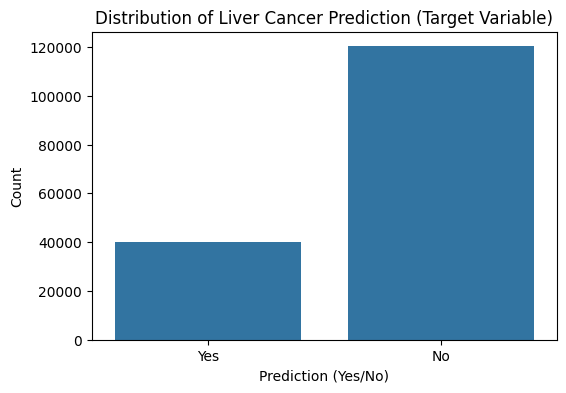

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Prediction"])
plt.title("Distribution of Liver Cancer Prediction (Target Variable)")
plt.xlabel("Prediction (Yes/No)")
plt.ylabel("Count")
plt.show()

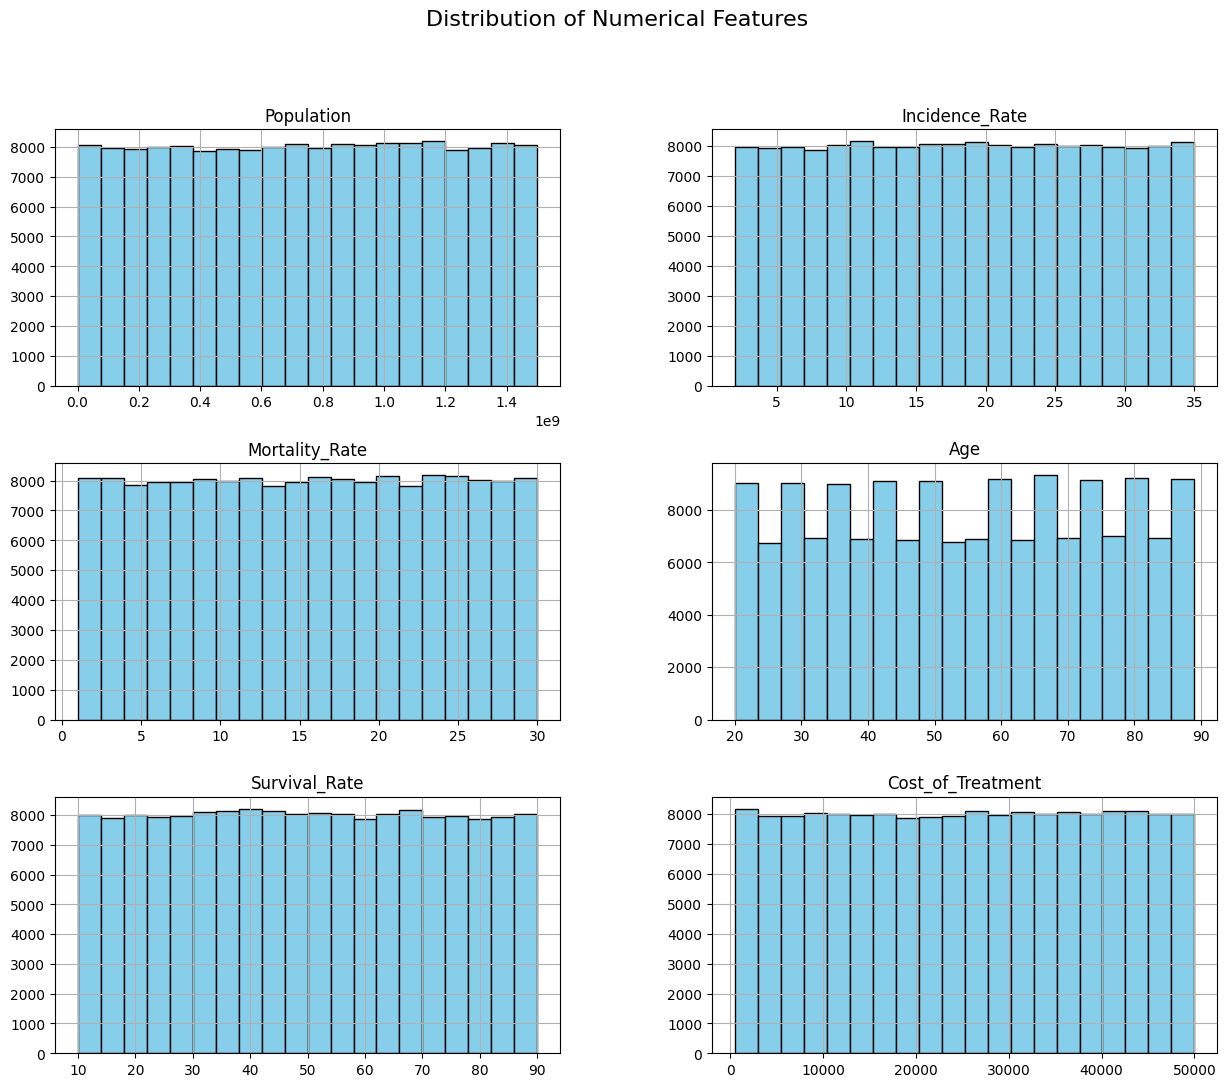

In [11]:
# List of numeric columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Histograms for numerical features
data[numerical_cols].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

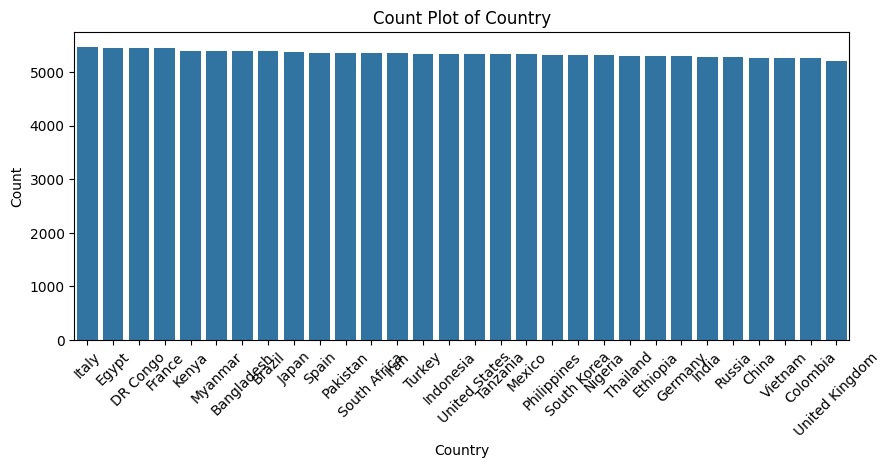


Value counts for Country:
Country
Italy             5473
Egypt             5449
DR Congo          5448
France            5442
Kenya             5393
Myanmar           5388
Bangladesh        5388
Brazil            5385
Japan             5380
Spain             5361
Pakistan          5360
South Africa      5359
Iran              5353
Turkey            5342
Indonesia         5342
United States     5341
Tanzania          5336
Mexico            5329
Philippines       5316
South Korea       5316
Nigeria           5315
Thailand          5307
Ethiopia          5307
Germany           5304
India             5287
Russia            5282
China             5261
Vietnam           5260
Colombia          5259
United Kingdom    5209
Name: count, dtype: int64


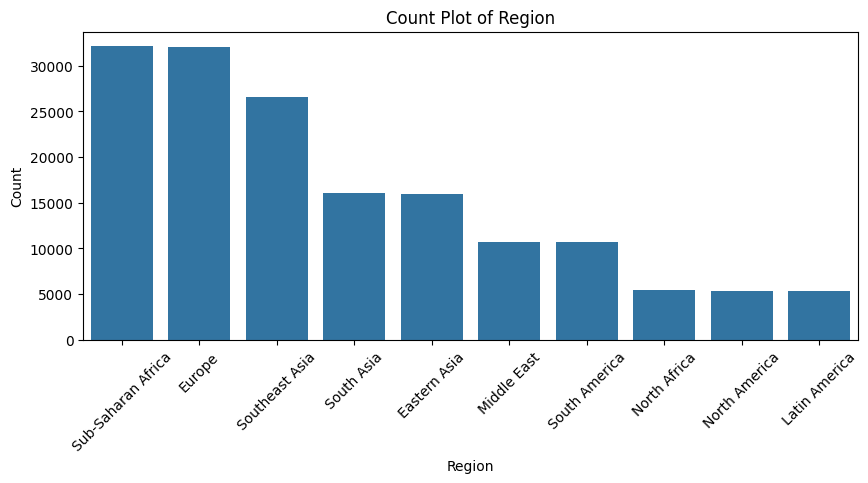


Value counts for Region:
Region
Sub-Saharan Africa    32158
Europe                32071
Southeast Asia        26613
South Asia            16035
Eastern Asia          15957
Middle East           10695
South America         10644
North Africa           5449
North America          5341
Latin America          5329
Name: count, dtype: int64


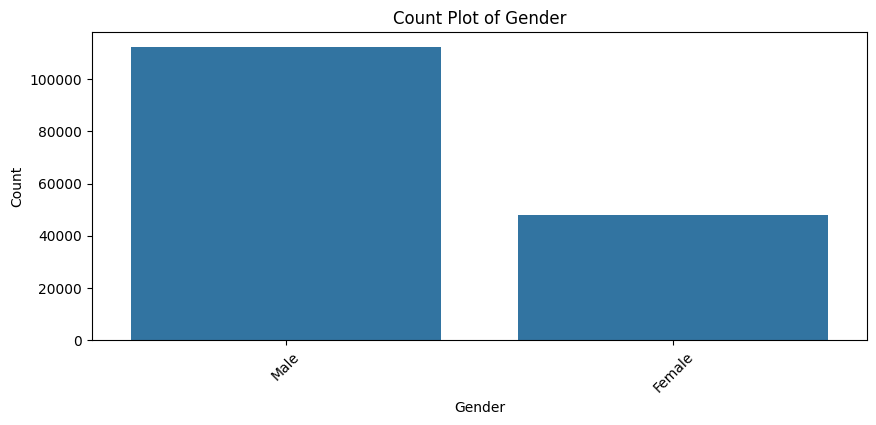


Value counts for Gender:
Gender
Male      112391
Female     47901
Name: count, dtype: int64


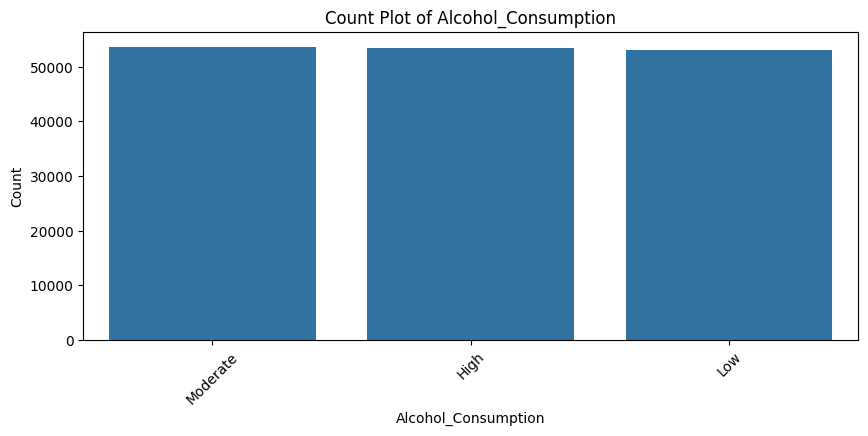


Value counts for Alcohol_Consumption:
Alcohol_Consumption
Moderate    53708
High        53437
Low         53147
Name: count, dtype: int64


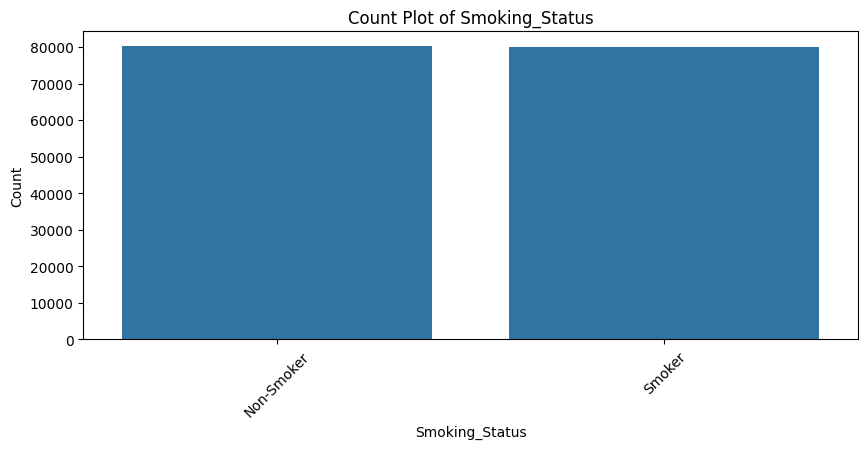


Value counts for Smoking_Status:
Smoking_Status
Non-Smoker    80237
Smoker        80055
Name: count, dtype: int64


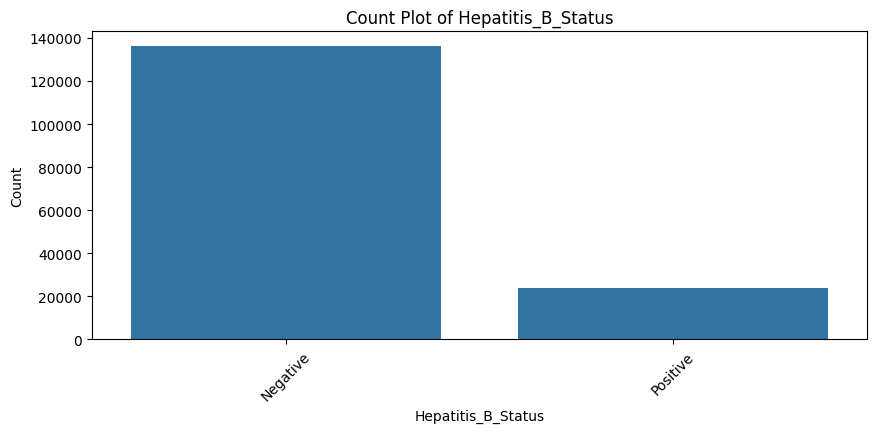


Value counts for Hepatitis_B_Status:
Hepatitis_B_Status
Negative    136245
Positive     24047
Name: count, dtype: int64


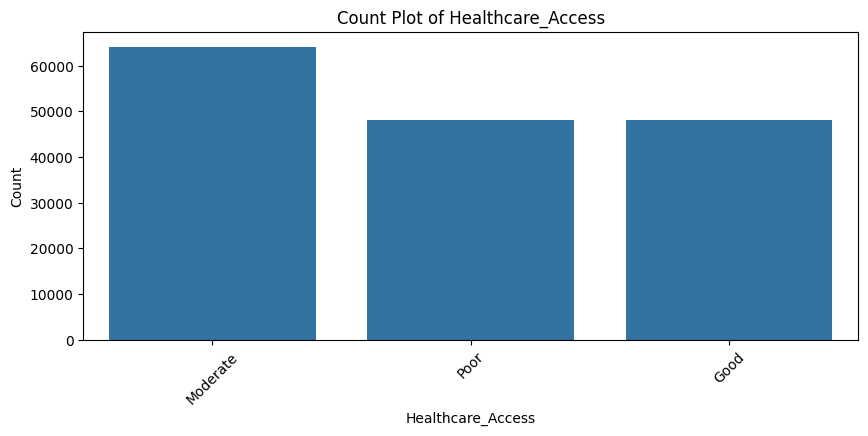


Value counts for Healthcare_Access:
Healthcare_Access
Moderate    64191
Poor        48071
Good        48030
Name: count, dtype: int64


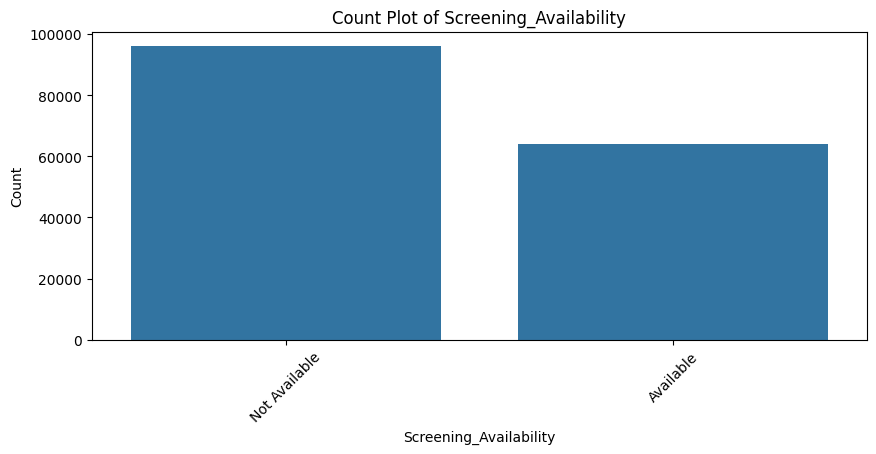


Value counts for Screening_Availability:
Screening_Availability
Not Available    96065
Available        64227
Name: count, dtype: int64


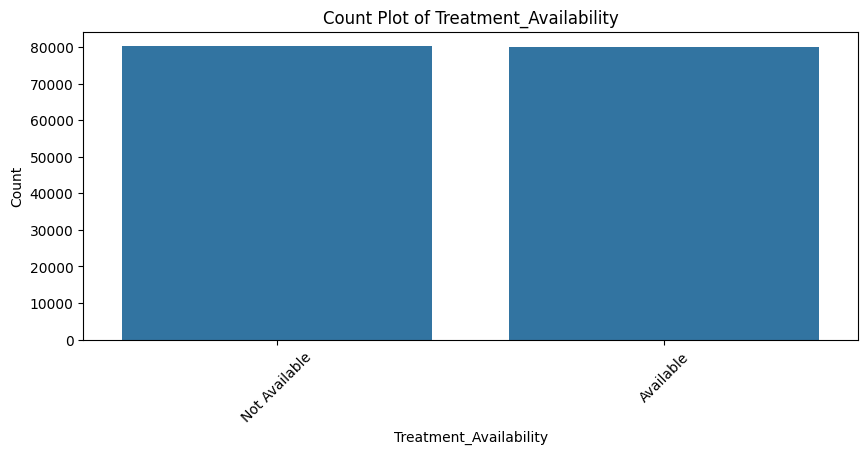


Value counts for Treatment_Availability:
Treatment_Availability
Not Available    80182
Available        80110
Name: count, dtype: int64


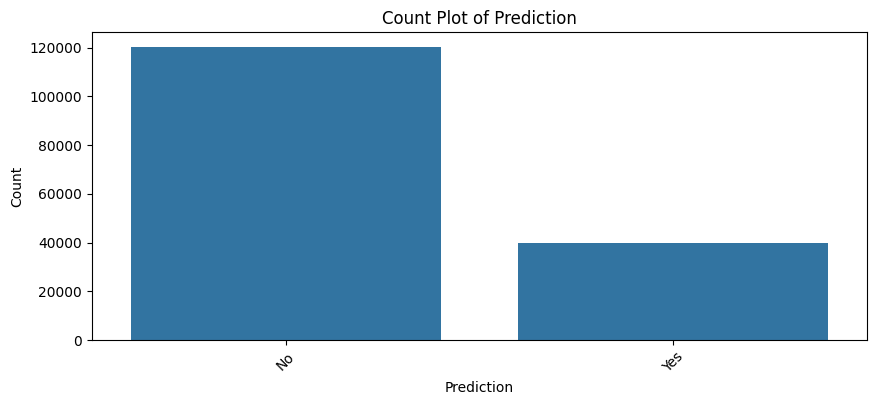


Value counts for Prediction:
Prediction
No     120270
Yes     40022
Name: count, dtype: int64


In [12]:
categorical_cols = ['Country', 'Region', 'Gender', 'Alcohol_Consumption', 
                    'Smoking_Status', 'Hepatitis_B_Status', 'Healthcare_Access', 
                    'Screening_Availability', 'Treatment_Availability', 'Prediction']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    order = data[col].value_counts().index  # Sorting by frequency
    sns.countplot(x=col, data=data, order=order)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels if needed for clarity
    plt.show()
    
    # Print frequency counts
    print(f'\nValue counts for {col}:')
    print(data[col].value_counts())

In [13]:
# Box plot for each numerical feature to detect outliers
# Loop through numerical columns and calculate outliers using the IQR method
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    print(f'{col}:')
    print(f'  Lower bound: {lower_bound}')
    print(f'  Upper bound: {upper_bound}')
    print(f'  Number of outliers: {len(outliers)}')
    print()

Population:
  Lower bound: -746981231.75
  Upper bound: 2250942024.25
  Number of outliers: 0

Incidence_Rate:
  Lower bound: -14.328074421487676
  Upper bound: 51.39901030403759
  Number of outliers: 0

Mortality_Rate:
  Lower bound: -13.495580568177942
  Upper bound: 44.59121430184888
  Number of outliers: 0

Age:
  Lower bound: -15.5
  Upper bound: 124.5
  Number of outliers: 0

Survival_Rate:
  Lower bound: -29.42653490221992
  Upper bound: 129.38976433453269
  Number of outliers: 0

Cost_of_Treatment:
  Lower bound: -24363.426878205122
  Upper bound: 74894.08152771971
  Number of outliers: 0



The IQR-based outlier detection results indicate that none of the numerical features—Population, Incidence_Rate, Mortality_Rate, Age, Survival_Rate, and Cost_of_Treatment—have any values falling outside the computed lower and upper bounds. Although the calculated lower bounds for several features are negative (for instance, Population at –746,981,231.75 and Survival_Rate at –29.43), this outcome is a byproduct of the IQR method and does not necessarily imply that the actual data contains negative values. The absence of detected outliers suggests that the data points for these features are relatively concentrated within a consistent range, which bodes well for subsequent analyses. However, it is important to verify that these negative thresholds are appropriate given the context of each variable—especially for features that should logically only have non-negative values—to ensure that no data quality issues are being overlooked.

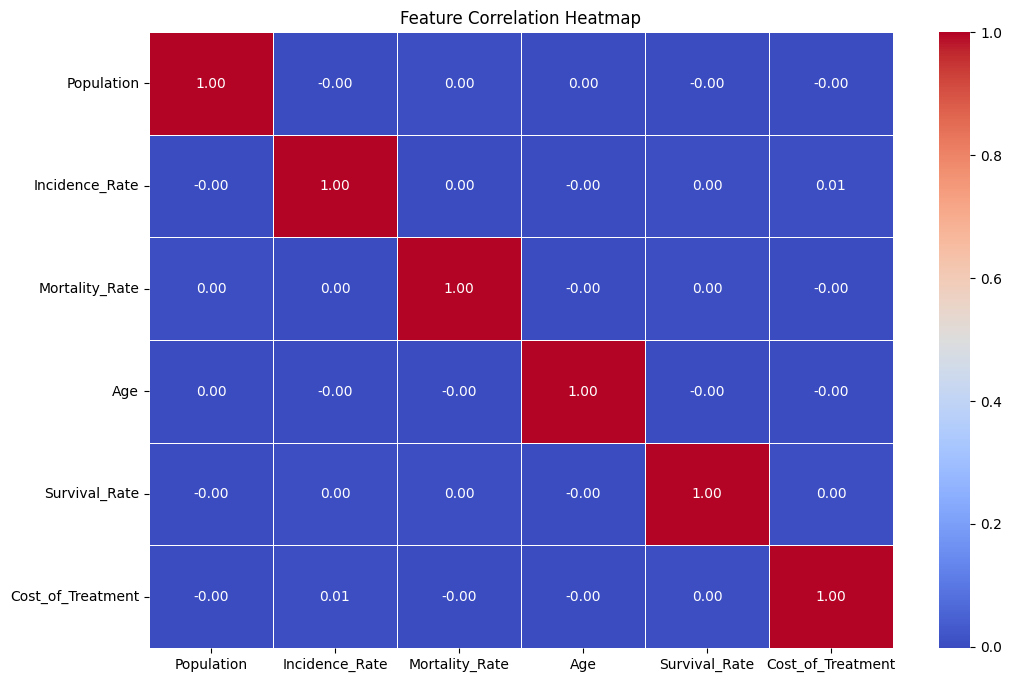

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories with their natural order
ordinal_categories = {
    'Alcohol_Consumption': ['Low', 'Moderate', 'High'],
    'Healthcare_Access': ['Poor', 'Moderate', 'Good'],
    'Preventive_Care': ['Poor', 'Moderate', 'Good'],
    'Obesity': ['Underweight', 'Normal', 'Overweight', 'Obese'],
    'Seafood_Consumption': ['Low', 'Medium', 'High']
}

# List of ordinal column names (keys from our dictionary)
ordinal_cols = list(ordinal_categories.keys())

# Create an instance of OrdinalEncoder with our specified category order
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_cols])

# Fit and transform the ordinal columns in the dataset
data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])

In [16]:
from sklearn.preprocessing import OneHotEncoder

# List of nominal columns (adjust as needed based on your data/documentation)
nominal_columns = [
    'Country', 'Region', 'Gender', 'Smoking_Status', 
    'Hepatitis_B_Status', 'Hepatitis_C_Status', 'Diabetes', 
    'Rural_or_Urban', 'Herbal_Medicine_Use', 
    'Screening_Availability', 'Treatment_Availability', 
    'Liver_Transplant_Access', 'Ethnicity', 'Prediction'
]

# Extract the nominal columns
nominal_data = data[nominal_columns]

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the nominal data
nominal_encoded = ohe.fit_transform(nominal_data)

# Retrieve the new feature names generated by the encoder
encoded_feature_names = ohe.get_feature_names_out(nominal_columns)

# Create a DataFrame from the encoded data
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=encoded_feature_names, index=data.index)

# Drop the original nominal columns from 'data'
data = data.drop(columns=nominal_columns)

# Concatenate the original data (with ordinal and other columns) with the new one-hot encoded columns
data = pd.concat([data, nominal_encoded_df], axis=1)

In [17]:
data.select_dtypes(exclude=[np.number]).columns

Index([], dtype='object')

The conversion of categorical variables was a critical preprocessing step in preparing the dataset for further analysis and modeling. For the ordinal features, such as Alcohol_Consumption, Healthcare_Access, Preventive_Care, Obesity, and Seafood_Consumption, an OrdinalEncoder was applied with predefined category orders to preserve the inherent ranking present in the data. This ensured that the relative differences among categories were maintained and could be effectively utilized by the model. In contrast, the nominal variables—which include features like Country, Region, Gender, and several others—were transformed using scikit-learn’s OneHotEncoder, with the ‘drop=first’ parameter to mitigate multicollinearity. This approach converted each categorical value into binary features without implying any ordinal relationship among them.

In [18]:
data.head()

,Population,Incidence_Rate,Mortality_Rate,Age,Alcohol_Consumption,Obesity,Seafood_Consumption,Healthcare_Access,Preventive_Care,Survival_Rate,...,Rural_or_Urban_Urban,Herbal_Medicine_Use_Yes,Screening_Availability_Not Available,Treatment_Availability_Not Available,Liver_Transplant_Access_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Mixed,Prediction_Yes
0,340672131,15.381360,6.160480,81,0.0,1.0,1.0,0.0,2.0,17.724793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1054632817,3.306101,14.392985,87,0.0,0.0,2.0,2.0,1.0,19.558853,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,751241440,9.325053,12.777878,34,1.0,0.0,1.0,2.0,1.0,68.468892,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1167333367,9.399658,8.634609,63,0.0,0.0,1.0,2.0,1.0,18.200287,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1082070787,9.665663,12.422518,85,2.0,3.0,1.0,1.0,1.0,45.019153,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# List the continuous columns that should be scaled
columns_to_scale = ['Population', 'Incidence_Rate', 'Mortality_Rate', 'Age', 'Survival_Rate', 'Cost_of_Treatment']

# Verify which of these columns exist in your data (in case some are missing)
columns_to_scale = [col for col in columns_to_scale if col in data.columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the dataset to store the scaled values (optional)
data_scaled = data.copy()

# Fit the scaler on the selected columns and transform them
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

   Population  Incidence_Rate  Mortality_Rate       Age  Alcohol_Consumption  \
0   -0.952020       -0.330283       -1.117933  1.305712                  0.0   
1    0.697509       -1.599577       -0.135164  1.602916                  0.0   
2   -0.003444       -0.966893       -0.327970 -1.022386                  1.0   
3    0.957892       -0.959051       -0.822580  0.414100                  0.0   
4    0.760902       -0.931090       -0.370392  1.503848                  2.0   

   Obesity  Seafood_Consumption  Healthcare_Access  Preventive_Care  \
0      1.0                  1.0                0.0              2.0   
1      0.0                  2.0                2.0              1.0   
2      0.0                  1.0                2.0              1.0   
3      0.0                  1.0                2.0              1.0   
4      3.0                  1.0                1.0              1.0   

   Survival_Rate  ...  Rural_or_Urban_Urban  Herbal_Medicine_Use_Yes  \
0      -1.399223  ..

In [20]:
data_scaled.head()

,Population,Incidence_Rate,Mortality_Rate,Age,Alcohol_Consumption,Obesity,Seafood_Consumption,Healthcare_Access,Preventive_Care,Survival_Rate,...,Rural_or_Urban_Urban,Herbal_Medicine_Use_Yes,Screening_Availability_Not Available,Treatment_Availability_Not Available,Liver_Transplant_Access_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Mixed,Prediction_Yes
0,-0.952020,-0.330283,-1.117933,1.305712,0.0,1.0,1.0,0.0,2.0,-1.399223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.697509,-1.599577,-0.135164,1.602916,0.0,0.0,2.0,2.0,1.0,-1.319607,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.003444,-0.966893,-0.327970,-1.022386,1.0,0.0,1.0,2.0,1.0,0.803559,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.957892,-0.959051,-0.822580,0.414100,0.0,0.0,1.0,2.0,1.0,-1.378582,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.760902,-0.931090,-0.370392,1.503848,2.0,3.0,1.0,1.0,1.0,-0.214385,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Scaling the variables was a crucial preprocessing step, particularly given the disparate ranges among the continuous features such as Population, Incidence_Rate, Mortality_Rate, Age, and Survival_Rate. By applying StandardScaler, I standardized these features to have a mean of zero and a unit variance, which not only prevents features with larger magnitudes from dominating the learning process but also promotes faster and more reliable convergence of many machine learning algorithms. Creating a copy of the dataset before scaling was equally important, as it preserved the original unaltered values.